<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [2]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


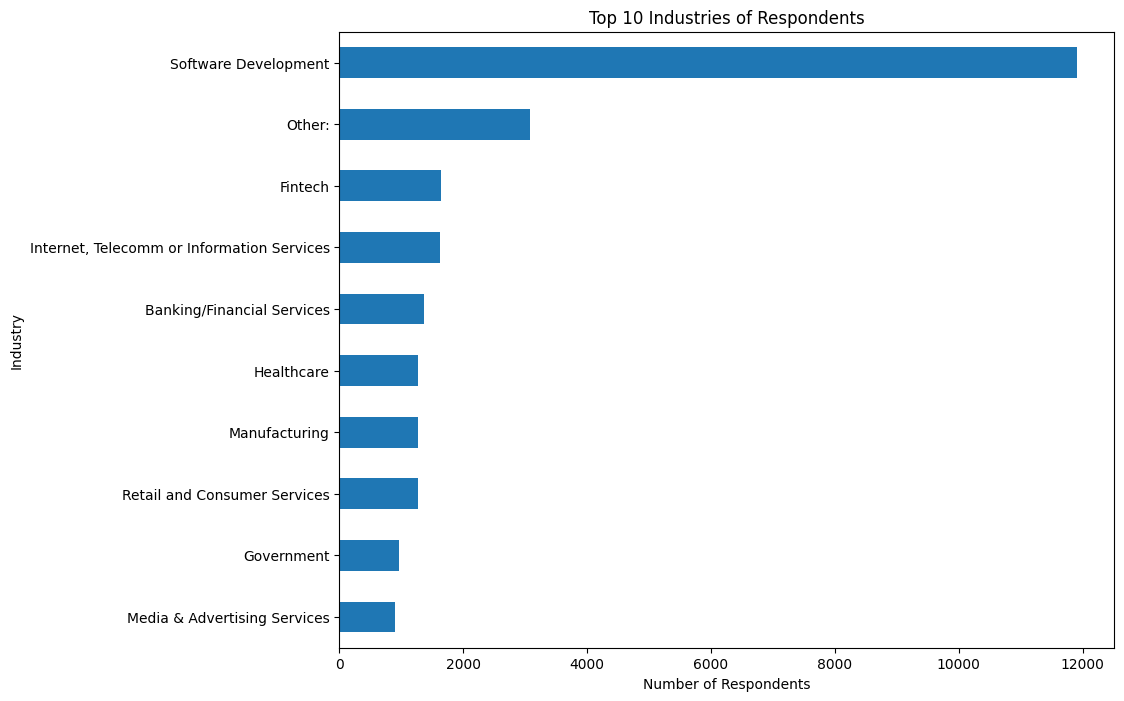

In [3]:
##Write your code here
# Create a horizontal bar chart for the top 10 industries
df['Industry'].value_counts().head(10).plot(kind='barh', figsize=(10, 8))
plt.title('Top 10 Industries of Respondents')
plt.xlabel('Number of Respondents')
plt.ylabel('Industry')
plt.gca().invert_yaxis() # Invert y-axis to show the top industry at the top
plt.show()

<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [4]:
##Write your code here
# Calculate basic statistics for 'ConvertedCompYearly'
mean_comp = df['ConvertedCompYearly'].mean()
median_comp = df['ConvertedCompYearly'].median()
std_comp = df['ConvertedCompYearly'].std()

print(f"Mean Compensation: ${mean_comp:,.2f}")
print(f"Median Compensation: ${median_comp:,.2f}")
print(f"Standard Deviation: ${std_comp:,.2f}")

# Define the outlier threshold
outlier_threshold = mean_comp + (3 * std_comp)
print(f"\nOutlier Threshold (Mean + 3*STD): ${outlier_threshold:,.2f}")

# Identify and display outliers
high_comp_outliers = df[df['ConvertedCompYearly'] > outlier_threshold]
print(f"\nNumber of high compensation outliers: {len(high_comp_outliers)}")
print("\nOutliers:")
print(high_comp_outliers[['ConvertedCompYearly']])

Mean Compensation: $86,155.29
Median Compensation: $65,000.00
Standard Deviation: $186,756.97

Outlier Threshold (Mean + 3*STD): $646,426.21

Number of high compensation outliers: 89

Outliers:
       ConvertedCompYearly
529               650000.0
828              1000000.0
1932              945000.0
2171              750000.0
2187             2000000.0
...                    ...
38219            1000000.0
39643            1300000.0
40066             800000.0
40952             750000.0
41027             700000.0

[89 rows x 1 columns]


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


Q1: $32,712.00
Q3: $107,971.50
IQR: $75,259.50
Upper Bound for Outliers: $220,860.75


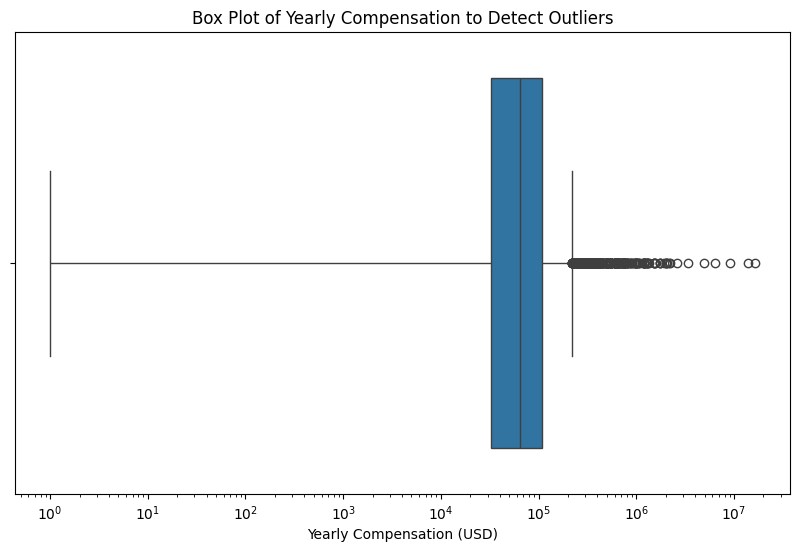

In [5]:
##Write your code here
# Calculate the first quartile (Q1), third quartile (Q3), and IQR
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

# Determine the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1: ${Q1:,.2f}")
print(f"Q3: ${Q3:,.2f}")
print(f"IQR: ${IQR:,.2f}")
print(f"Upper Bound for Outliers: ${upper_bound:,.2f}")

# Visualize the outliers using a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='ConvertedCompYearly')
plt.title('Box Plot of Yearly Compensation to Detect Outliers')
plt.xlabel('Yearly Compensation (USD)')
plt.xscale('log') # Use a log scale for better visualization of the spread
plt.show()

<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [6]:
##Write your code here
# Remove outliers based on the IQR bounds
df_no_outliers = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]

# Validate the size of the new DataFrame
print("Original number of rows:", len(df))
print("Number of rows after removing outliers:", len(df_no_outliers))

Original number of rows: 65437
Number of rows after removing outliers: 22457


<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


In [8]:
import numpy as np

C:\Users\Sebastian\AppData\Local\Temp\ipykernel_11796\3908811783.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['Age_Numeric'] = df_no_outliers['Age'].apply(clean_age)
C:\Users\Sebastian\AppData\Local\Temp\ipykernel_11796\3908811783.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['YearsCodePro'] = pd.to_numeric(df_no_outliers['YearsCodePro'], errors='coerce')
C:\Users\Sebastian\AppData\Local\Temp\ipykernel_11796\3908811783.py:26: SettingWithCopyWarning: 
A value is t

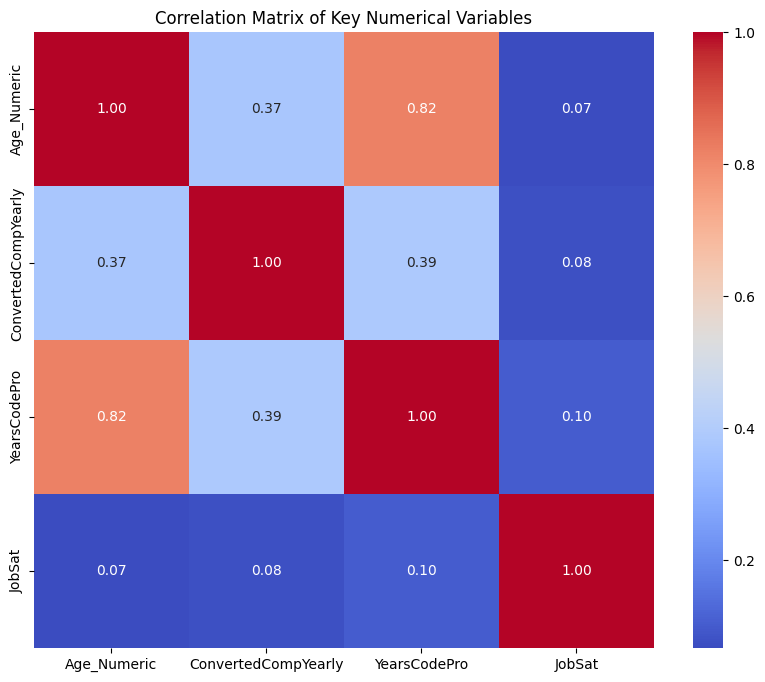

In [10]:
##Write your code here
# Clean and map the 'Age' column to numeric values
def clean_age(age_string):
    if age_string == 'Under 18 years old':
        return 17
    elif age_string == '18-24 years old':
        return 21
    elif age_string == '25-34 years old':
        return 30
    elif age_string == '35-44 years old':
        return 40
    elif age_string == '45-54 years old':
        return 50
    elif age_string == '55-64 years old':
        return 60
    elif age_string == '65 years or older':
        return 65
    else:
        return np.nan

# Apply the function to the 'Age' column
df_no_outliers['Age_Numeric'] = df_no_outliers['Age'].apply(clean_age)

# --- FIX: Convert other correlation columns to numeric ---
df_no_outliers['YearsCodePro'] = pd.to_numeric(df_no_outliers['YearsCodePro'], errors='coerce')
df_no_outliers['JobSat'] = pd.to_numeric(df_no_outliers['JobSat'], errors='coerce')
# ---------------------------------------------------------

# Select key numerical columns for correlation analysis
correlation_cols = ['Age_Numeric', 'ConvertedCompYearly', 'YearsCodePro', 'JobSat']

# Compute the correlation matrix
correlation_matrix = df_no_outliers[correlation_cols].corr()

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Key Numerical Variables')
plt.show()

<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
